In [1]:
import pandas as pd
import numpy as np
import random as rnd


import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.svm as svm
import sklearn.metrics
from matplotlib import pyplot

In [5]:
#Importation des données
titanic_train='/Users/Naoufali/Desktop/M2 Ekap/titanic/train.csv'
titanic_test='/Users/Naoufali/Desktop/M2 Ekap/titanic/test.csv'
gender='/Users/Naoufali/Desktop/M2 Ekap/titanic/gender_submission.csv'

train = pd.read_csv(titanic_train)
test = pd.read_csv(titanic_test)
gender_submission = pd.read_csv(gender)

In [6]:
#Stat descriptive 
import matplotlib.pyplot
import pandas
import scipy.stats
import numpy

%matplotlib inline

In [10]:
# informations diverses
train.shape


(891, 12)

In [11]:
test.shape

(418, 11)

In [12]:
train.count()


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [13]:
test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [14]:
list(train.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Cabin?         891 non-null int64
male           891 non-null uint8
Q              891 non-null float64
S              891 non-null float64
dtypes: float64(4), int64(6), object(5), uint8(1)
memory usage: 105.4+ KB


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [15]:
#Statistique descriptive univarié 
# résumé basique
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# résumé basique
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


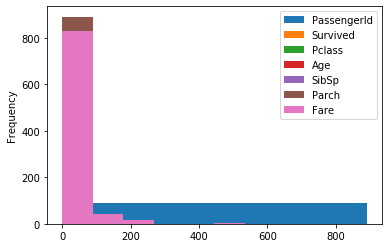

In [18]:
train.plot.hist()

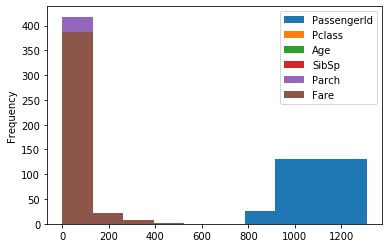

In [19]:
test.plot.hist()

In [22]:
#Variable qualitative 
pandas.crosstab(train.Sex, "freq")

col_0,freq
Sex,
female,314
male,577


In [23]:
pandas.crosstab(test.Sex, "freq")

col_0,freq
Sex,
female,152
male,266


In [25]:
pandas.crosstab(train.Embarked, "freq")

col_0,freq
Embarked,
C,168
Q,77
S,644


In [26]:
pandas.crosstab(test.Embarked, "freq")

col_0,freq
Embarked,
C,102
Q,46
S,270


In [27]:
#Visualisation
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
#Visualisation
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
#Visualisation

gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [37]:
train['Cabin?'] = np.where(pd.isnull(train['Cabin']), 0,1)
predictors = ['Pclass','Sex', 'Age', 'SibSp','Parch', 'Fare', 'Cabin?', 'Embarked']

In [31]:
#Suppression des valeurs Nan + maj 
def impute_age(cols):
    age = cols[0]
    sex = cols[1]
    pclass = cols[2]
    if pd.isnull(age):
        if sex == 'female':
            if pclass == 1:
                return 35
            elif pclass == 2:
                return 28
            elif pclass == 3:
                return 21.5
            else:
                return np.nan
        elif sex == 'male':
            if pclass == 1:
                return 40
            elif pclass == 2:
                return 30
            elif pclass == 3:
                return 25
            else:
                return np.nan
    else:
        return age

    
train['Age']=train[['Age','Sex','Pclass']].apply(impute_age,axis=1)

In [32]:
male = pd.get_dummies(train['Sex'], drop_first=True)
port = pd.get_dummies(train['Embarked'], drop_first=True)
train = pd.concat([train, male, port],axis=1)
train[pd.isnull(train['Embarked'])==True]
train.loc[61,'Q']=0.33
train.loc[61,'S']=0.33
train.loc[829,'Q']=0.33
train.loc[829,'S']=0.33
predictors_num = ['Pclass', 'male', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin?', 'Q','S']

In [9]:
yX_tr, X_test, y_tr, y_test = sklearn.model_selection.train_test_split(train[predictors_num],train['Survived'], random_state = 1)

In [10]:
X_tr

,Pclass,male,Age,SibSp,Parch,Fare,Cabin?,Q,S
35,1,1,42.0,1,0,52.0000,0,0.0,1.0
46,3,1,25.0,1,0,15.5000,0,1.0,0.0
453,1,1,49.0,1,0,89.1042,1,0.0,0.0
291,1,0,19.0,1,0,91.0792,1,0.0,0.0
748,1,1,19.0,1,0,53.1000,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...
715,3,1,19.0,0,0,7.6500,1,0.0,1.0
767,3,0,30.5,0,0,7.7500,0,1.0,0.0
72,2,1,21.0,0,0,73.5000,0,0.0,1.0
235,3,0,21.5,0,0,7.5500,0,0.0,1.0


In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split 
#On importe la fonction train_test_split de la librairie sklearn (fonction pour diviser aléatoirement une base)
from sklearn import metrics #la librairie metrics permet de faire des calcul sur les modèles de sklearn
from sklearn.model_selection import cross_val_score


MLP_model = MLPClassifier()
MLP_model.fit(X_tr,y_tr)
y_pred=MLP_model.predict(X_test)

/Users/Naoufali/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [26]:
from sklearn.neural_network import MLPClassifier

MLP_model = MLPClassifier()
MLP_model.fit(X_tr,y_tr)


#Taux de prédiction sur l'échantillon d'entrainement(in-sample), ici toute la base : 100%
print("Taux de prédiction sur échantillon d'entrainement : {}" .format(MLP_model.score(X_tr,y_tr)))

#Taux de prédiction hors échantillon découpé aléatoirement:
MLP_model.fit(X_tr,y_tr)
y_pred=MLP_model.predict(X_test)
#Taux de prédiction de 95,6% 

print("Taux de prédiction sur échantillon découpé aléatoirement:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n") #Taux de bonne prédiction
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)) #Matrice de confusion

#Taux de prédiction moyen à l'aide de la cross validation:
cv_results = cross_val_score(MLP_model, X_tr, y_tr, cv=10)
moyenne_cv_results = cv_results.mean()
print("Taux dde prédiction trouvés : {}" .format(cv_results))
print("Taux de prédiction de Cross-Validation (moyenne) : {}" .format(moyenne_cv_results))



/Users/Naoufali/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Taux de prédiction sur échantillon d'entrainement : 0.8218562874251497
Taux de prédiction sur échantillon découpé aléatoirement: 0.7892376681614349 

[[112  16]
 [ 31  64]]


/Users/Naoufali/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Taux dde prédiction trouvés : [0.79411765 0.70149254 0.6119403  0.67164179 0.76119403 0.74626866
 0.76119403 0.6969697  0.66666667 0.78787879]
Taux de prédiction de Cross-Validation (moyenne) : 0.7199364141857558
